# Visualisation tools

A demonstration of various visualisation tools to display AHN elevation surfaces, BGT data, and LAS point cloud labels.

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt

import set_path
import src.utils.ahn_utils as ahn_utils
import src.utils.las_utils as las_utils
import src.utils.plot_utils as plot_utils

In [2]:
# Load data.
tilecode = '2386_9702'

# Labelled LAS file (see Notebook 0).
las_file = '../datasets/pointcloud/processed_' + tilecode + '.laz'

# AHN data folder.
ahn_data_folder = '../datasets/ahn/'
# File with BGT building polygons.
bgt_building_file = '../datasets/bgt/bgt_buildings_demo.csv'
# File with BGT road polygons.
bgt_road_file = '../datasets/bgt/bgt_roads_demo.csv'
# File with <x,y> coordinates of pole-like objects.
bgt_pole_file = '../datasets/bgt/custom_pole_points_demo.csv'
# File with <x,y> coordinates of street furniture objects.
bgt_street_furniture_file = '../datasets/bgt/bgt_street_furniture_points_demo.csv'

# AHNReader for elevation data.
ahn_reader = ahn_utils.NPZReader(ahn_data_folder)

### Plot BGT data

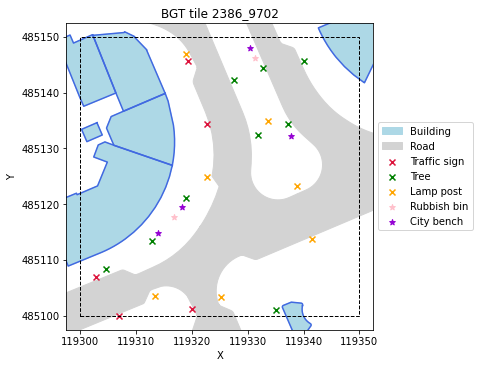

In [3]:
plot_utils.plot_bgt(tilecode, bgt_building_file, bgt_road_file, bgt_pole_file, bgt_street_furniture_file)

In [ ]:
plt.savefig(f'bgt_data_{tilecode}.png', dpi=150)

### Plot AHN ground and building surfaces together

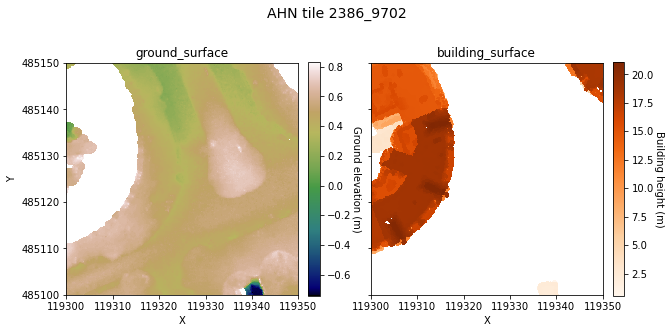

In [4]:
# Either side-by-side..
plot_utils.plot_ahn_sidebyside(tilecode, ahn_reader)

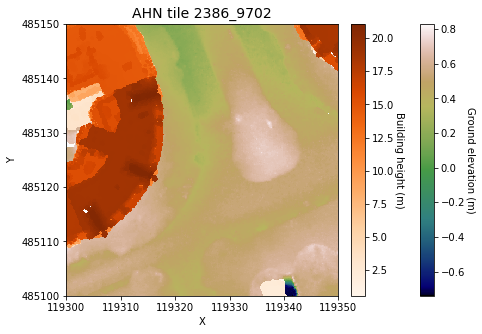

In [5]:
# ..or together in one image.
plot_utils.plot_ahn_merged(tilecode, ahn_reader)

In [ ]:
plt.savefig(f'ahn_ground+building_{tilecode}.png', dpi=150)

### Plot BGT building footprints and AHN building surface

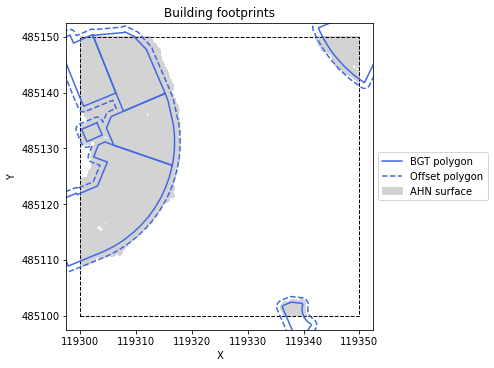

In [6]:
plot_utils.plot_buildings_ahn_bgt(tilecode, ahn_reader, bgt_building_file, offset=1, show_elevation=False, offset_only=False)

In [ ]:
plt.savefig(f'building_ahn+bgt_{tilecode}.png', dpi=150)

### Plot BGT data and LAS pointcloud labels side by side

This also demonstrates how customized plots can be created by passing the target axes handle to the plotting functions.

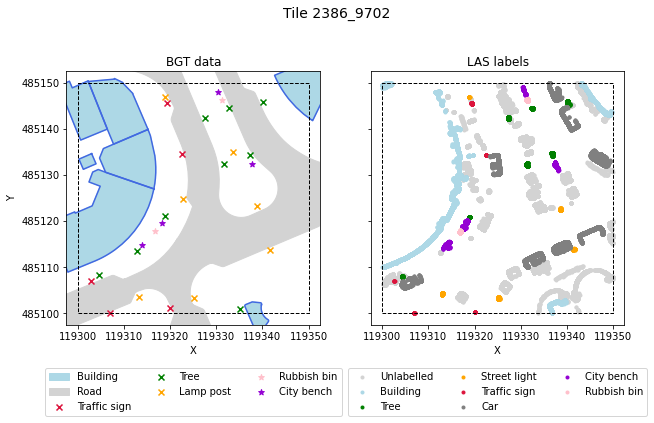

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plot_utils.plot_bgt(tilecode, bgt_building_file, bgt_road_file, bgt_pole_file, bgt_street_furniture_file, title='BGT data', ax=ax1, legend_below=True)
plot_utils.plot_cloud_slice(las_file, ahn_reader, plane_height=.75, hide_noise=True, title='LAS labels', ax=ax2, legend_below=True)
ax2.set_yticklabels([])
ax2.yaxis.label.set_visible(False)
fig.suptitle(f'Tile {tilecode}', fontsize=14)
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
plt.savefig(f'bgt+labels_{tilecode}.png', dpi=150)

### Visualise the locations of all point cloud tiles in a folder

Tiles are shown as squares overlayed on an OpenStreetMap of the area. Hoovering over a tile displays its tilecode.

In [ ]:
tile_folder = '../datasets/pointcloud/'
tiles = las_utils.get_tilecodes_from_folder(tile_folder)

tiles_map = plot_utils.plot_tiles_map(tiles, width=800, height=600, zoom_start=16)
tiles_map

### Close all figures

In [ ]:
plt.close('all')